In [1]:
import numpy as np
from anfis_toolbox import QuickANFIS, quick_evaluate

# 1. Prepare your data
X = np.random.uniform(-2, 2, (100, 2))  # 2 inputs
y = X[:, 0]**2 + X[:, 1]**2  # Target: x1² + x2²

# 2. Create and train model (one line!)
model = QuickANFIS.for_regression(X, n_mfs=3)
losses = model.fit_hybrid(X, y, epochs=50)

# 3. Evaluate and use
metrics = quick_evaluate(model, X, y)
predictions = model.predict([[1.0, -0.5], [0.5, 1.2]])

print(f"R² Score: {metrics['r2']:.4f}")

ANFIS Model Evaluation Results
Mean Squared Error (MSE):     0.000786
Root Mean Squared Error:      0.028043
Mean Absolute Error (MAE):    0.023627
R-squared (R²):               0.9997
Mean Abs. Percentage Error:   364.55%
Maximum Error:                6.878198
Standard Deviation of Error:  2.474607
R² Score: 0.9997


In [6]:
import numpy as np
from anfis_toolbox import QuickANFIS

# Generate data
X = np.random.uniform(-3, 3, (200, 2))
y = np.sin(X[:, 0]) * np.cos(X[:, 1]) + 0.1 * np.random.randn(200)

# Create and train model
model = QuickANFIS.for_regression(X, n_mfs=4, mf_type='gaussian')
losses = model.fit_hybrid(X, y, epochs=100, learning_rate=0.01)

# Evaluate and visualize
# Evaluate (placeholder)
pred = model.predict(X[:5])
metrics = quick_evaluate(model, X, y)
print(f"R² Score: {metrics['r2']:.4f}")
print(pred[:3])

ANFIS Model Evaluation Results
Mean Squared Error (MSE):     0.008008
Root Mean Squared Error:      0.089486
Mean Absolute Error (MAE):    0.066921
R-squared (R²):               0.9663
Mean Abs. Percentage Error:   460.00%
Maximum Error:                2.075404
Standard Deviation of Error:  0.684013
R² Score: 0.9663
[[-0.0553184 ]
 [ 0.24896099]
 [ 0.17627969]]


In [7]:
import numpy as np
from anfis_toolbox import ANFISBuilder

# Prepare data
X = np.random.uniform(-1, 1, (300, 3))
y = X[:, 0] * X[:, 1] + np.sin(X[:, 2]) + 0.05 * np.random.randn(300)

# Configure model
config = dict(n_epochs=150, learning_rate=0.02)

# Build model with custom architecture
builder = (ANFISBuilder()
    .add_input('x1', 'gaussian', n_mfs=3)
    .add_input('x2', 'bell', n_mfs=4)
    .add_input('x3', 'triangular', n_mfs=2)
    .set_config(config)
)

model = builder.build()

# Train with validation
losses = model.fit_hybrid(X, y, **config)

# Comprehensive evaluation
# Placeholder evaluation
print(f"Loss history (len): {len(losses)}")

# Save model
# Placeholder persistence
# model.save('complex_model.pkl')

TypeError: ANFISBuilder.add_input() missing 1 required positional argument: 'range_max'

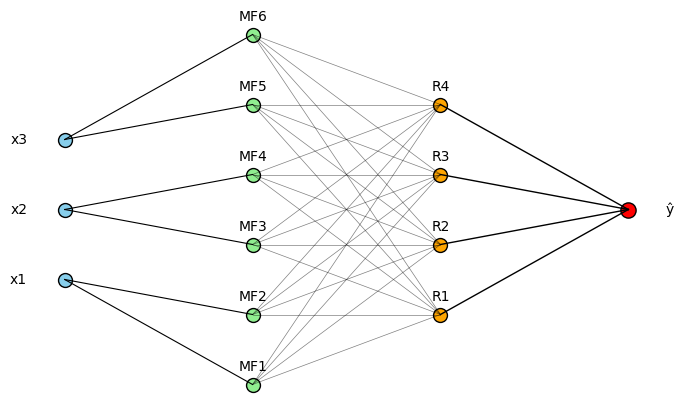

In [9]:
import matplotlib.pyplot as plt

def plot_anfis_structure(n_inputs=2, mfs_per_input=2, n_rules=4):
    fig, ax = plt.subplots(figsize=(8, 5))

    # função auxiliar: cria coordenadas centralizadas
    def centered_positions(x, n):
        offset = (n - 1) / 2
        return [(x, i - offset) for i in range(n)]

    # posições dos nós
    layers = {
        "inputs": centered_positions(0, n_inputs),
        "mfs": centered_positions(1, n_inputs * mfs_per_input),
        "rules": centered_positions(2, n_rules),
        "output": [(3, 0)],  # sempre centrado
    }

    # plot inputs
    for idx, (x, y) in enumerate(layers["inputs"], start=1):
        ax.scatter(x, y, c="skyblue", s=100, edgecolors="k")
        ax.text(x - 0.2, y, f"x{idx}", ha="right", va="center")

    # plot membership functions
    for idx, (x, y) in enumerate(layers["mfs"], start=1):
        ax.scatter(x, y, c="lightgreen", s=100, edgecolors="k")
        ax.text(x, y + 0.2, f"MF{idx}", ha="center")

    # plot rules
    for idx, (x, y) in enumerate(layers["rules"], start=1):
        ax.scatter(x, y, c="orange", s=100, edgecolors="k")
        ax.text(x, y + 0.2, f"R{idx}", ha="center")

    # plot output
    x, y = layers["output"][0]
    ax.scatter(x, y, c="red", s=120, edgecolors="k")
    ax.text(x + 0.2, y, "ŷ", va="center")

    # conexões inputs -> MFs
    for i, (xi, yi) in enumerate(layers["inputs"]):
        for j in range(mfs_per_input):
            xm, ym = layers["mfs"][i * mfs_per_input + j]
            ax.plot([xi, xm], [yi, ym], "k-", lw=0.8)

    # conexões MFs -> Regras (simplificação: conecta todas)
    for (xm, ym) in layers["mfs"]:
        for (xr, yr) in layers["rules"]:
            ax.plot([xm, xr], [ym, yr], "k-", lw=0.5, alpha=0.5)

    # conexões Regras -> Saída
    xo, yo = layers["output"][0]
    for (xr, yr) in layers["rules"]:
        ax.plot([xr, xo], [yr, yo], "k-", lw=1)

    ax.axis("off")
    plt.show()


plot_anfis_structure(n_inputs=3, mfs_per_input=2, n_rules=4)